In [2]:
import torch
import numpy as np

from matplotlib import pyplot as plt


In [10]:
def f1(x):
    return x**3 - x

def f2(x):
    μ = 0
    σ = 1
    return np.exp( -(x - μ)**2 / σ**2 )

def f3(x):
    return np.sin(2*x) + np.cos(8*x) + np.sin(16*x)

def f4(x):
    #if (x < 0)
    return (x < 0) * f1(x) + (x >= 0) * (x + 5) 


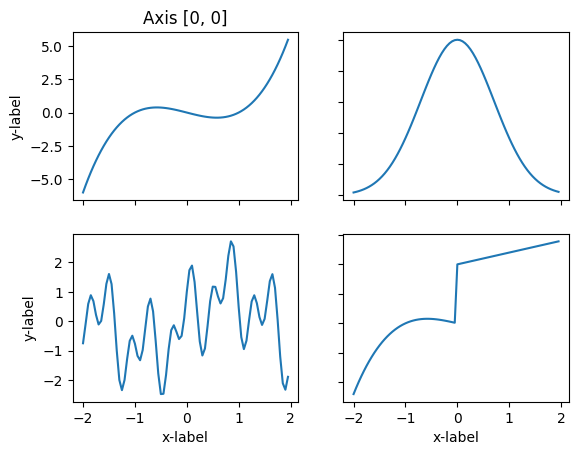

In [11]:
X = np.arange(-2, 2, 0.05)

funcs = [f1, f2, f3, f4]

fig, axs = plt.subplots(2, 2)

for i in range (0, 4):


    axs[i//2, i%2].plot(X, funcs[i](X))
    axs[0, 0].set_title('Axis [0, 0]')
#    axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn

class MLP_8(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
#            nn.Linear(64, 32),
#            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [15]:
mlp = MLP_8()

loss_function = nn.L1Loss()
#optimizer = torch.optim.Adagrad(mlp.parameters(), lr=1e-4)
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.01) #, momentum=0.9)


dataset = pd.DataFrame([X, Y])
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)



In [ ]:
epochs = [1, 10, 50, 100, 1000, 10000]

for epoch in epochs:
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

        if i%10 == 0:
            print(f'Loss after mini-batch %5d: %.3f'%(i+1, current_loss/500))
            current_loss = 0.0

    print(f'Epoch {epoch+1} finished')

print("Training has completed")